In [1]:
import time, os
import numpy as np
import pandas as pd
from model import LSTM_model
from get_dataset_new import IMU_dataset
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
created_time = int(time.time())

epochs = 10
frame_len = 20
batch_size = 64
learning_rate = 0.0001
loss = 'categorical_crossentropy'
dataset_dir = 'dataset_new'

In [3]:
data = IMU_dataset(dataset_dir)
pose_list = os.listdir('./' + dataset_dir)
x_data, y_data, y_list = data.Sequence_data(frame_len)
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
y_data = to_categorical(y_data, len(pose_list))
print(np.shape(x_data), np.shape(y_data))

(137577, 20, 6) (137577, 5)


In [4]:
print(y_list)

['running.csv', 'Sitting_on_chair.csv', 'Sit_to_stand.csv', 'standing.csv', 'walking.csv']


In [5]:
num_degree = np.shape(x_data)[-1]
num_pose = len(os.listdir('./'+dataset_dir))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            18176     
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 5)                 85        
                                                                 
Total params: 257,957
Trainable params: 257,957
Non-trai

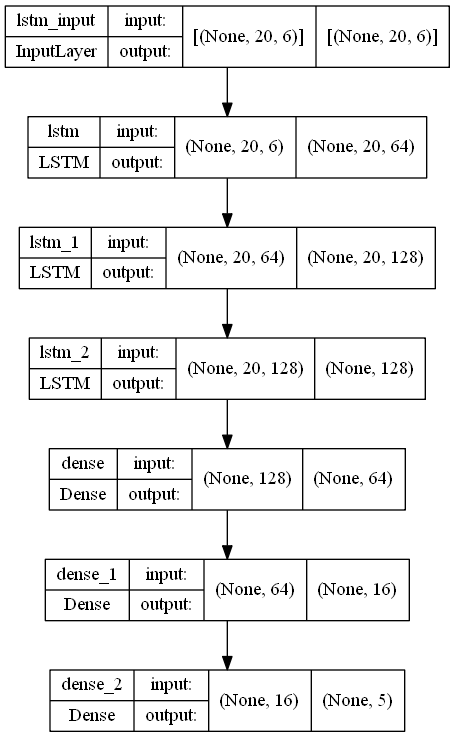

In [6]:
model = LSTM_model(num_degree, num_pose)
model.summary()
plot_model(model, show_shapes=True)

In [7]:
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=loss,
    metrics=['acc'])

In [25]:
cb = EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, mode='min',
    baseline=None, restore_best_weights=True
)

In [26]:
x_train, x_val, y_train, y_val, = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

In [28]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    callbacks=[cb]
)

Epoch 1/50
1720/1720 [==============================] - 136s 79ms/step - loss: 0.0049 - acc: 0.9989 - val_loss: 0.0025 - val_acc: 0.9994
Epoch 2/50
1720/1720 [==============================] - 129s 75ms/step - loss: 0.0043 - acc: 0.9990 - val_loss: 0.0038 - val_acc: 0.9988
Epoch 3/50
1720/1720 [==============================] - 130s 76ms/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0012 - val_acc: 0.9996
Epoch 4/50
1720/1720 [==============================] - 134s 78ms/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0016 - val_acc: 0.9992
Epoch 5/50
1720/1720 [==============================] - 125s 72ms/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0013 - val_acc: 0.9995
Epoch 6/50
1720/1720 [==============================] - 128s 74ms/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0011 - val_acc: 0.9996
Epoch 7/50
1720/1720 [==============================] - 129s 75ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0018 - val_acc: 0.9993
Epoch 8/50
1720/1720 [===================

In [29]:
model.save(f'models/{loss}_{created_time}/model.h5')

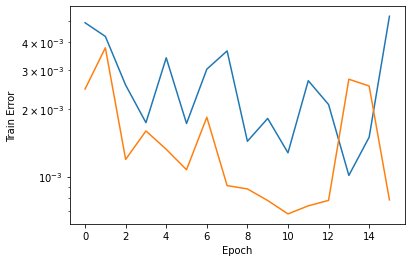

In [31]:
plt.figure()
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.savefig(f"models/{loss}_{created_time}/train_error.png")
plt.show()